In [1]:
#pip install scikit-learn

In [2]:
#pip install pandas

In [3]:
#pip install matplotlib

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import tkinter as tk
from tkinter import ttk, messagebox
from sklearn.metrics.pairwise import linear_kernel
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import CountVectorizer



In [5]:
#อ่านไฟล์
df = pd.read_csv("Movies100.csv")

In [6]:
#นำHeaderที่สนใจไปใส่ในตัวแปร
columns_of_interest = ['Title', 'Start Date', 'Audience Score', 'Critics Score','Audience Sentiment','Critics Sentiment']
#รวมข้อมูลในคอลัมน์ที่กำหนดเข้าด้วยกันในรูปแบบของสตริง และสร้างเป็น list
documents = df[columns_of_interest].apply(lambda x: ' '.join(x.astype(str)), axis=1).tolist()

In [7]:
#Bag Of Words
from sklearn.feature_extraction.text import CountVectorizer

# สร้าง Bag Of Words
vectorizer = CountVectorizer()
bag_of_words = vectorizer.fit_transform(documents)

# Print คำ
print("Vocabulary:")
print(vectorizer.get_feature_names_out())

# Print bag of words
print("\nBag of Words:")
print(bag_of_words.toarray())


Vocabulary:
['01' '02' '03' '05' '06' '07' '08' '09' '10' '100' '11' '12' '13' '14'
 '15' '16' '17' '18' '19' '1939' '1959' '1984' '1986' '1989' '1993' '1999'
 '20' '2001' '2008' '2012' '2014' '2015' '2016' '2017' '2018' '2019'
 '2020' '2021' '2022' '2023' '2024' '2040' '21' '22' '23' '24' '25' '26'
 '27' '28' '29' '30' '31' '32' '33' '34' '35' '36' '37' '375' '38' '39'
 '40' '41' '42' '43' '44' '45' '47' '48' '49' '50' '51' '52' '53' '54'
 '55' '56' '57' '58' '59' '5b' '5lbs' '60' '61' '62' '63' '64' '65' '66'
 '67' '68' '69' '70' '71' '72' '73' '74' '75' '76' '77' '78' '79' '80'
 '81' '82' '83' '84' '85' '86' '87' '88' '89' '90' '91' '92' '93' '94'
 '95' '96' '97' '98' '99' 'abigail' 'abortion' 'about' 'absence' 'acasa'
 'accidental' 'accountant' 'across' 'act' 'acts' 'advocates' 'afghan'
 'after' 'afterlife' 'agenda' 'aida' 'air' 'alex' 'alice' 'aligned'
 'alive' 'all' 'alone' 'amateur' 'amelia' 'american' 'amélie' 'an'
 'anatomy' 'and' 'angel' 'angels' 'angry' 'animal' 'anthony' 'a

In [8]:
#Show TF-IDF

# Initialize TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the documents
tfidf_matrix = tfidf_vectorizer.fit_transform(documents)

# แสดงShape
print("Shape of TF-IDF matrix:", tfidf_matrix.shape)

# แสดงผล
print("Feature names:", tfidf_vectorizer.get_feature_names_out())

# แสดงผลเป็นArray
print("TF-IDF values of the first document:", tfidf_matrix[0].toarray())


Shape of TF-IDF matrix: (525, 941)
Feature names: ['01' '02' '03' '05' '06' '07' '08' '09' '10' '100' '11' '12' '13' '14'
 '15' '16' '17' '18' '19' '1939' '1959' '1984' '1986' '1989' '1993' '1999'
 '20' '2001' '2008' '2012' '2014' '2015' '2016' '2017' '2018' '2019'
 '2020' '2021' '2022' '2023' '2024' '2040' '21' '22' '23' '24' '25' '26'
 '27' '28' '29' '30' '31' '32' '33' '34' '35' '36' '37' '375' '38' '39'
 '40' '41' '42' '43' '44' '45' '47' '48' '49' '50' '51' '52' '53' '54'
 '55' '56' '57' '58' '59' '5b' '5lbs' '60' '61' '62' '63' '64' '65' '66'
 '67' '68' '69' '70' '71' '72' '73' '74' '75' '76' '77' '78' '79' '80'
 '81' '82' '83' '84' '85' '86' '87' '88' '89' '90' '91' '92' '93' '94'
 '95' '96' '97' '98' '99' 'abigail' 'abortion' 'about' 'absence' 'acasa'
 'accidental' 'accountant' 'across' 'act' 'acts' 'advocates' 'afghan'
 'after' 'afterlife' 'agenda' 'aida' 'air' 'alex' 'alice' 'aligned'
 'alive' 'all' 'alone' 'amateur' 'amelia' 'american' 'amélie' 'an'
 'anatomy' 'and' 'angel' 

In [9]:
#show Similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# TF-IDF vectorization
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(documents)

# Calculate cosine similarity between documents
cosine_sim_matrix = cosine_similarity(tfidf_matrix)

cosine_sim_df = pd.DataFrame(cosine_sim_matrix, columns=range(len(documents)), index=range(len(documents)))


# Display cosine similarity matrix
print("Cosine Similarity Matrix:")
print(cosine_sim_df)


Cosine Similarity Matrix:
          0         1         2         3         4         5         6    \
0    1.000000  0.028546  0.011663  0.143385  0.011490  0.045665  0.182627   
1    0.028546  1.000000  0.056878  0.064894  0.056035  0.063462  0.030382   
2    0.011663  0.056878  1.000000  0.040778  0.252140  0.111367  0.012413   
3    0.143385  0.064894  0.040778  1.000000  0.040174  0.081062  0.357741   
4    0.011490  0.056035  0.252140  0.040174  1.000000  0.109716  0.012229   
..        ...       ...       ...       ...       ...       ...       ...   
520  0.049580  0.046163  0.116886  0.079272  0.115153  0.145408  0.052769   
521  0.097736  0.137172  0.093510  0.100591  0.092124  0.116328  0.104022   
522  0.194494  0.022346  0.123079  0.085547  0.020072  0.040932  0.092242   
523  0.038728  0.036059  0.091303  0.061921  0.089949  0.113582  0.041219   
524  0.039577  0.036849  0.093304  0.063278  0.091920  0.116071  0.042122   

          7         8         9    ...       515 

O:\AnacondaNavigator\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
O:\AnacondaNavigator\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


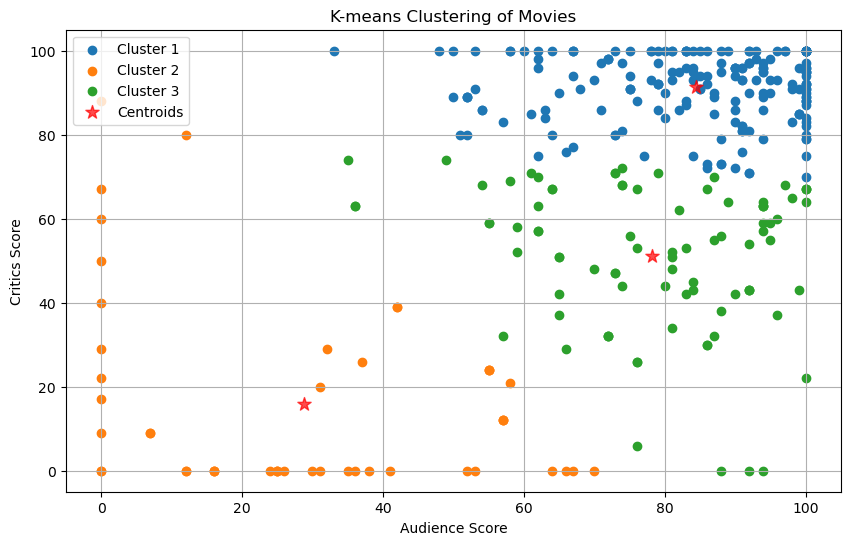

In [10]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# โหลดData
file_path = 'Movies100.csv'
data = pd.read_csv(file_path)

# เลือกฟีเจอร์ที่จะนำมาใช้
features = data[['Audience Score', 'Critics Score']].dropna()

# ทำ K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=0) # You can adjust the number of clusters
kmeans.fit(features)

# แยก labels and centroids
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Plotting the graph using Critics Score and Audience Score
plt.figure(figsize=(10, 6))

# plot
for i in range(kmeans.n_clusters):
    cluster_points = features[labels == i]
    plt.scatter(cluster_points['Audience Score'], cluster_points['Critics Score'], label=f'Cluster {i+1}')

# Plotting centroids
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=100, alpha=0.7, marker='*', label='Centroids')

plt.title('K-means Clustering of Movies')
plt.xlabel('Audience Score')
plt.ylabel('Critics Score')
plt.legend()
plt.grid(True)
plt.show()


In [11]:
import tkinter as tk
from tkinter import ttk
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from sklearn.cluster import KMeans


# ทำให้แน่ใจว่าคะแนนยังคงเป็นตัวเลข
df['Audience Score'] = pd.to_numeric(df['Audience Score'], errors='coerce')
df['Critics Score'] = pd.to_numeric(df['Critics Score'], errors='coerce')
df.dropna(subset=['Audience Score', 'Critics Score'], inplace=True)

# K-Means Clsutering
kmeans = KMeans(n_clusters=3, random_state=0)
df['Cluster'] = kmeans.fit_predict(df[['Audience Score', 'Critics Score']])

# TF-IDF setup
vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1, 2))
df['combined_text'] = df.apply(lambda row: ' '.join(map(str, row)), axis=1)
tfidf_matrix = vectorizer.fit_transform(df['combined_text'])

# Tkinter setup
root = tk.Tk()
root.title("Search with TF-IDF and Clustering")
root.geometry('800x600')  # Window size

# Styling
style = ttk.Style()
style.theme_use('clam')

# Frames
top_frame = ttk.Frame(root)
top_frame.pack(pady=10)
bottom_frame = ttk.Frame(root)
bottom_frame.pack(pady=10, expand=True, fill='both')

# ฟังก์ชั่นSearch
def search():
    for i in tree.get_children():
        tree.delete(i)
    query = search_var.get()
    if not query:
        display_data()
        return
    query_vector = vectorizer.transform([query])
    cosine_similarities = linear_kernel(query_vector, tfidf_matrix).flatten()
    top_indices = cosine_similarities.argsort()[::-1][:10]  # Adjust the number of results as needed
    
    min_similarity_threshold = 0.1  # ปีับระดับค่าsimให้โชว์ได้
    added_titles = set()  # กันแสดงผลข้อมูลซ้ำ
    for rank, index in enumerate(top_indices, start=1):
        similarity_score = cosine_similarities[index]
        if similarity_score < min_similarity_threshold:
            continue  # ข้ามถ้าเงื่อนไขไม่ตรง
        row = df.iloc[index]
        title = row['Title']
        if title in added_titles:
            continue  # ข้ามถ้าเพิ่ม
        tree.insert("", tk.END, values=(rank, round(similarity_score, 2), title, row['Start Date'], row['Audience Score'], row['Critics Score'], row['Audience Sentiment'], row['Critics Sentiment'], row['Cluster']))
        added_titles.add(title)  # เพิ่มtitle ลงไป

def display_data():
    # โชว์dataถ้า user ไม่ Query
    for index, row in df.iterrows():
        title = row['Title']
        tree.insert("", tk.END, values=(index+1, "", title, row['Start Date'], row['Audience Score'], row['Critics Score'], row['Audience Sentiment'], row['Critics Sentiment'], row['Cluster']))

# Search UI
search_var = tk.StringVar()
search_entry = ttk.Entry(top_frame, textvariable=search_var, width=25)
search_entry.pack(side=tk.LEFT, padx=10)
search_button = ttk.Button(top_frame, text="Search", command=search)
search_button.pack(side=tk.LEFT, padx=10)

# แสดงผลลัพธ์
columns = ['Rank', 'Similarity Score', 'Title', 'Start Date', 'Audience Score', 'Critics Score', 'Audience Sentiment', 'Critics Sentiment', 'Cluster']
tree = ttk.Treeview(bottom_frame, columns=columns, show="headings")
for col in columns:
    tree.heading(col, text=col)
    tree.column(col, anchor="center")
tree.pack(expand=True, fill='both')

# Main
root.mainloop()


O:\AnacondaNavigator\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
O:\AnacondaNavigator\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
